# About the Dataset

This dataset was taken from https://www.kaggle.com and it collects the top 100+ airlines in the world (by the size of their fleet). It is combined with information found on Wikipedia on the respective airline's fleet and the average value/cost of the manufactured airplane.


### Dataset includes:

Parent Airline: International Airlines Group

Airline: Airline names which are owned by Parent Airlines

Aircraft Type: Manufacturer & Model

Current: Quantity of airplanes in Operation

Future and Orders: Quantity of airplanes on order

Unit Cost: Average unit cost (Dollars in Millions) of Aircraft Type

Total Cost: Current quantity * Unit Cost 

Average Age: Average age of "Current" airplanes by "Aircraft Type"

# Importing required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style("darkgrid")

# Importing the dataset

In [5]:
df= pd.read_csv(r"C:\Users\avgee\Downloads/Fleet Data.csv")
df

ParserError: Error tokenizing data. C error: Expected 1 fields in line 4, saw 2


### Columns and Rows

In [4]:
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])

Number of rows: 1583
Number of columns: 11


### Removing dollar symbol from Unit cost and Total cost column

In [5]:
df['Unit Cost'].replace('\$','',regex=True,inplace=True)
df['Total Cost (Current)'].replace('\$','',regex=True,inplace=True)

#removing comma
df['Total Cost (Current)'].replace('\,','',regex=True,inplace=True)

#converting them to float
df['Unit Cost']=df['Unit Cost'].astype(float)
df['Total Cost (Current)']=df['Total Cost (Current)'].astype(float)

### Basic information about the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Parent Airline        1583 non-null   object 
 1   Airline               1583 non-null   object 
 2   Aircraft Type         1583 non-null   object 
 3   Current               859 non-null    float64
 4   Future                188 non-null    float64
 5   Historic              1113 non-null   float64
 6   Total                 1484 non-null   float64
 7   Orders                348 non-null    float64
 8   Unit Cost             1548 non-null   float64
 9   Total Cost (Current)  1556 non-null   float64
 10  Average Age           820 non-null    float64
dtypes: float64(8), object(3)
memory usage: 136.2+ KB


### Checking null/nan values

In [7]:
df.isna().sum()

Parent Airline             0
Airline                    0
Aircraft Type              0
Current                  724
Future                  1395
Historic                 470
Total                     99
Orders                  1235
Unit Cost                 35
Total Cost (Current)      27
Average Age              763
dtype: int64

### Dealing with null/nan values

In [9]:
df['Current']= df['Current'].fillna(df.Current.mean())
df['Future']= df['Future'].fillna(0)
df['Historic']=df['Historic'].fillna(df.Historic.median())
df['Total']= df['Total'].fillna(df.Current+ df.Historic+ df.Future)
df['Orders']= df['Orders'].fillna(0)
df['Unit Cost']= df['Unit Cost'].fillna(df['Unit Cost'].mean())
df['Total Cost (Current)']=df['Total Cost (Current)'].fillna(df.Current*df["Unit Cost"])
df['Average Age']=df['Average Age'].fillna(df['Average Age'].mean())

### Summary of numeric columns

In [10]:
df.describe()

,Current,Future,Historic,Total,Orders,Unit Cost,Total Cost (Current),Average Age
count,1583.00000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000
mean,24.03376,0.401769,12.282375,25.119559,5.807960,117.808786,1500.811366,10.115000
std,30.26144,1.939423,20.216852,45.569993,22.930495,96.258073,3467.157963,4.935401
min,1.00000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.100000
25%,10.00000,0.000000,4.000000,5.000000,0.000000,45.000000,0.000000,8.600000
50%,24.03376,0.000000,7.000000,12.000000,0.000000,90.000000,185.000000,10.115000
75%,24.03376,0.000000,11.000000,30.000000,0.000000,187.000000,1618.500000,10.115000
max,718.00000,38.000000,325.000000,952.000000,400.000000,433.000000,53118.000000,39.000000


# Queries

## 1] Find out top 2 aircraft maufactureres which the airlines preferred over time and find a way to understand success of each aircraft-type of these two companies.

In [11]:
#extracting manufacturer name from aircraft-type column
manufact= df['Aircraft Type'].str.split(expand=True)

# getting top 2 manufacturers
print('Top two aircraft selling companies:')
print(manufact[0].value_counts().head(2))

manufact

Top two aircraft selling companies:
Airbus    543
Boeing    473
Name: 0, dtype: int64


,0,1,2,3,4,5
0,Airbus,A319,None,None,None,None
1,Airbus,A319,None,None,None,None
2,Airbus,A320,None,None,None,None
3,Airbus,A320,None,None,None,None
4,Airbus,A321,None,None,None,None
...,...,...,...,...,...,...
1578,Boeing,757,None,None,None,None
1579,Boeing,767,None,None,None,None
1580,De,Havilland,Canada,DHC-8,Dash,8
1581,Airbus,A320,None,None,None,None


In [12]:
# extracting airbus and boeing's data
airbus= manufact[manufact[0]=='Airbus']
boeing= manufact[manufact[0]=='Boeing']

#dropping unncessary columns
a=airbus.drop([2,3,4,5], axis = 1)
b=boeing.drop([2,3,4,5], axis = 1)

#merging both airbus and boeing's data and renaming columns
merged= pd.concat([a,b])
merged.rename(columns = {0: 'Company', 1: 'Model'}, inplace =True)
merged

,Company,Model
0,Airbus,A319
1,Airbus,A319
2,Airbus,A320
3,Airbus,A320
4,Airbus,A321
...,...,...
1568,Boeing,737
1569,Boeing,777
1577,Boeing,737
1578,Boeing,757


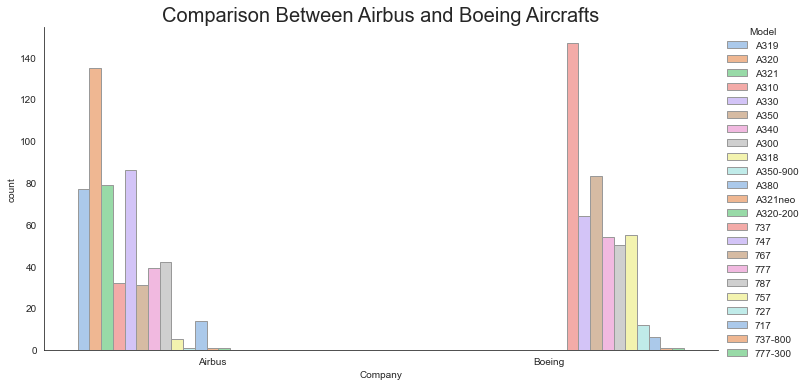

In [20]:
#plotting bargraph
sns.catplot(x="Company", hue="Model", kind="count",palette="pastel", 
            edgecolor=".6",data=merged,height=5, aspect=2)
plt.title('Comparison Between Airbus and Boeing Aircrafts',fontsize=20);

![title](1.png)

## 2] Take user input to access fleet distribution of any parent airline and plot an appropriate graph to understand variety of aircrafts within its fleet.

Enter Parent Airline name: Jet Airways

Current Aircrafts in Jet Airways Fleet: 
Airbus A320
Airbus A330
Airbus A340
ATR 42/72
Boeing 737
Boeing 777
Boeing 787



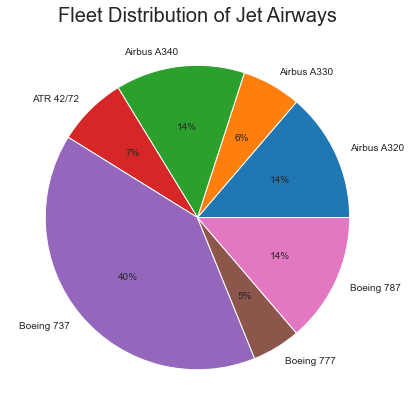

In [14]:
#taking user input
user_ip= input('Enter Parent Airline name: ')

#filtering data based on user_ip
a=df[df['Parent Airline']==user_ip]

print()

#printing aircrafts currently in use 
print("Current Aircrafts in {} Fleet: ".format(user_ip))
for i in range(len(a['Aircraft Type'].unique())):
    print(a['Aircraft Type'].unique()[i])

print()
    
# Creating plot
z= a[['Aircraft Type','Current']]
plt.figure(figsize =(10, 7))
plt.title('Fleet Distribution of {}'.format(user_ip),fontsize=20)
plt.pie(z['Current'], labels = z['Aircraft Type'], autopct='%1.0f%%')
plt.show()

<img src="2.png" width="5000"/>

## 3] You work in an airline consultancy firm and you often encounter a situation where you need to compare average ages of aircrafts belonging to any 2 given airlines. WAP to make your task easier.

Enter Airline Name: American Airlines
Enter another Airline to Compare: United Airlines


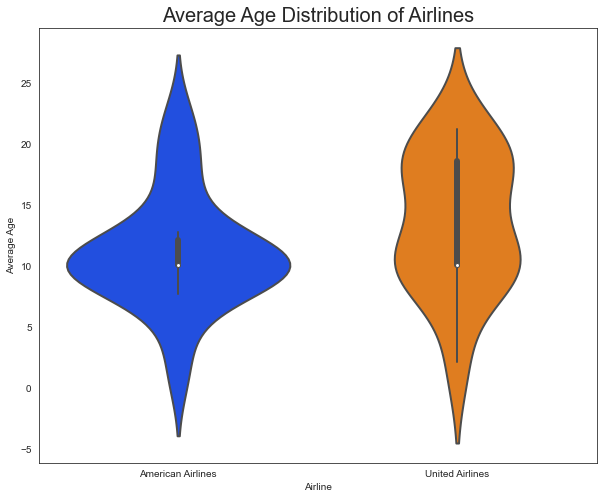

In [19]:
#taking user inputs
ip1= input('Enter Airline Name: ')
ip2= input('Enter another Airline to Compare: ')

#filtering data based on inputs
j=df[df['Airline']==ip1]
k=df[df['Airline']==ip2]
age_df1= j[['Airline','Average Age']].sort_values('Average Age',ascending=False)
age_df2= k[['Airline','Average Age']].sort_values('Average Age',ascending=False)

#merging filtered data
final= pd.concat([age_df1,age_df2])

#plotting violin graph
plt.figure(figsize=(10,8))
sns.violinplot(x ="Airline", y ="Average Age",data = final,linewidth=2
               ,palette='bright')
plt.title('Average Age Distribution of Airlines',fontsize=20);

![title](3.png)

## 4] Find out the popularity trend of different aircrafts over time by classifying them on the basis of their numbers in past, present and future. 

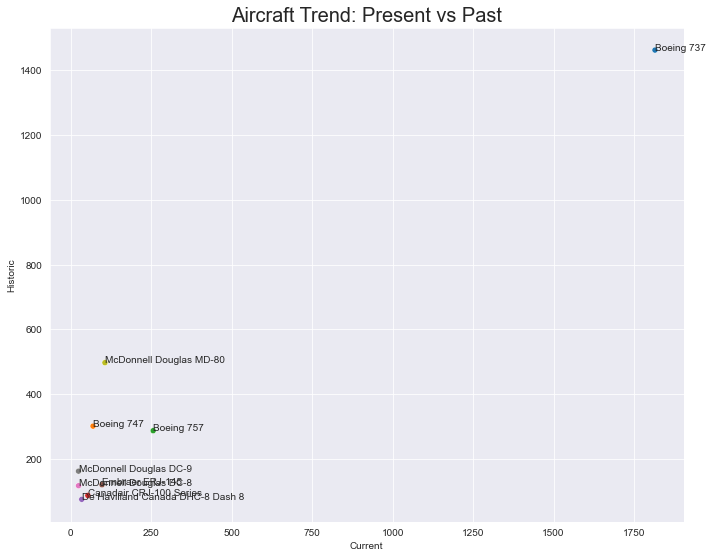

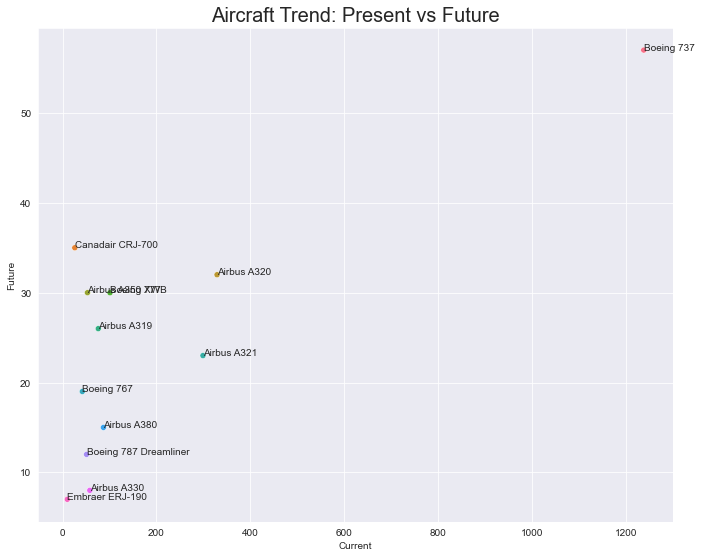

In [16]:
#classifying aircrafts based on their numbers in past/future
past_leaders= df.sort_values("Historic", 
                             ascending = False).reset_index(drop=True).head(25)
future_leaders= df.sort_values("Future",
                            ascending = False).reset_index(drop=True).head(25)

#grouping and arranging 
y=past_leaders.groupby('Aircraft Type',as_index=False)[['Current','Historic']].sum()
z=future_leaders.groupby('Aircraft Type',as_index=False)[['Current','Future']].sum()
zz=z.sort_values('Future',ascending=False)

#plotting graph
sns.set_style('darkgrid')
plt.figure(figsize=(25,20))
ax1 = plt.subplot(221)
y[["Current","Historic",'Aircraft Type']].apply(lambda x: ax1.text(*x),axis=1)
sns.scatterplot(data=y,x = "Current", y = "Historic",hue="Aircraft Type",legend=False)
plt.title('Aircraft Trend: Present vs Past',fontsize=20);

plt.figure(figsize=(25,20))
ax1 = plt.subplot(221)
zz[["Current","Future",'Aircraft Type']].apply(lambda x: ax1.text(*x),axis=1)
sns.scatterplot(data=zz,x = "Current", y = "Future",hue="Aircraft Type",legend=False)
plt.title('Aircraft Trend: Present vs Future',fontsize=20);

![](4.png)

## 5] Find which Parent Airline has maximum subsidiary airlines ,also find a way to understand how finance is divided for each subsidiary of that airline

In [17]:
#finding which parent airline has maximum occurances
print('Parent Airline with maximum subsidiaries:',
      df['Parent Airline'].value_counts().idxmax())

#subsettting lufthansa's part of the dataset
lufthansa_fleet= df[df['Parent Airline']=='Lufthansa']

#finding number of subsidiaries in lufthansa group
print('Subsidiaries under Lufthansa group:',lufthansa_fleet['Airline'].nunique())

lufthansa_fleet

Parent Airline with maximum subsidiaries: Lufthansa
Subsidiaries under Lufthansa group: 12


,Parent Airline,Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Unit Cost,Total Cost (Current),Average Age
990,Lufthansa,Lufthansa,Airbus A300,24.03376,0.0,26.0,26.0,0.0,75.0,0.0,10.115
991,Lufthansa,Lufthansa,Airbus A310,24.03376,0.0,25.0,25.0,0.0,75.0,0.0,10.115
992,Lufthansa,Austrian Airlines,Airbus A310,24.03376,0.0,4.0,4.0,0.0,75.0,0.0,10.115
993,Lufthansa,Lufthansa,Airbus A319,30.00000,0.0,5.0,35.0,0.0,90.0,2688.0,14.900
994,Lufthansa,Austrian Airlines,Airbus A319,7.00000,0.0,7.0,7.0,0.0,90.0,627.0,12.000
...,...,...,...,...,...,...,...,...,...,...,...
1085,Lufthansa,Austrian Airlines,McDonnell Douglas MD-80,24.03376,0.0,29.0,29.0,0.0,45.0,0.0,10.115
1086,Lufthansa,Germanwings,McDonnell Douglas MD-80,24.03376,0.0,4.0,4.0,0.0,45.0,0.0,10.115
1087,Lufthansa,Swiss International Airlines,McDonnell Douglas MD-80,24.03376,0.0,11.0,11.0,0.0,45.0,0.0,10.115
1088,Lufthansa,Edelweiss Air,McDonnell Douglas MD-80,24.03376,0.0,3.0,3.0,0.0,45.0,0.0,10.115


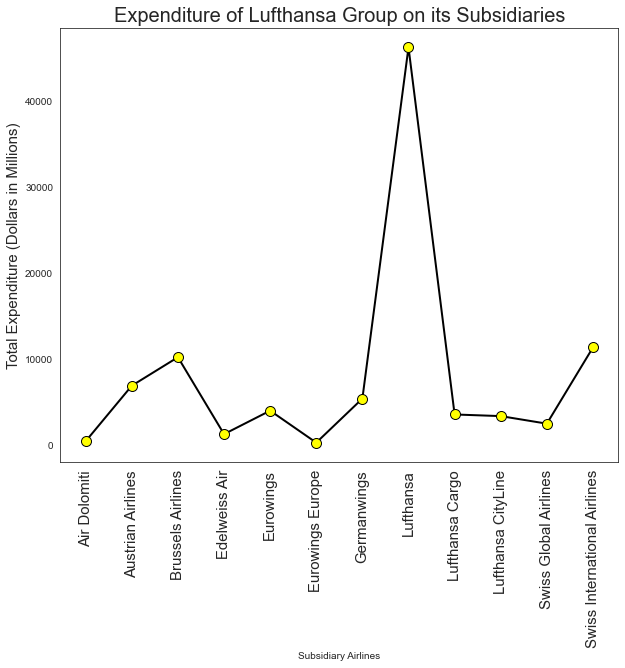

In [18]:
luft_grp=lufthansa_fleet.groupby('Airline',
                                 as_index=False)[['Total Cost (Current)']].sum()
gg= luft_grp.sort_values('Total Cost (Current)',ascending=False)

sns.set_style('white')
plt.figure(figsize=(10,8))
plt.plot(luft_grp["Airline"],luft_grp['Total Cost (Current)'],marker='.',c='black'
         ,mfc='yellow', lw=2, ms=20)
plt.xlabel('Subsidiary Airlines')
plt.ylabel('Total Expenditure (Dollars in Millions)',fontsize=15)
plt.xticks(rotation=90,fontsize=15)
plt.title("Expenditure of Lufthansa Group on its Subsidiaries",fontsize=20);

![](5.png)